In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"C:\Users\ANUSHA\Downloads\hotel_bookings.csv")
df.shape  # Check rows and columns
df.head()  # Peek at the top 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#check for missing values


In [7]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
#check the duplicate

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
#data types and converstion

In [11]:
df.info()  # Check data types

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [ ]:
#Convert if needed:

In [13]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
#Exploratory Data Analysis (EDA)

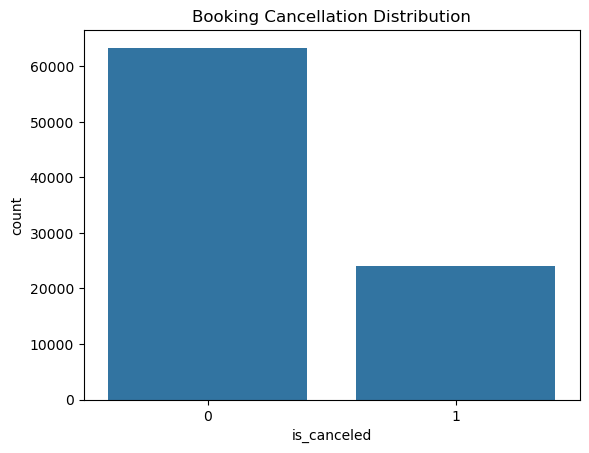

is_canceled
0    0.725102
1    0.274898
Name: proportion, dtype: float64

In [15]:
sns.countplot(data=df, x='is_canceled')
plt.title('Booking Cancellation Distribution')
plt.show()

df['is_canceled'].value_counts(normalize=True)

In [ ]:
## Select only numeric columns for correlation

In [21]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [ ]:
## Plot the correlation matrix

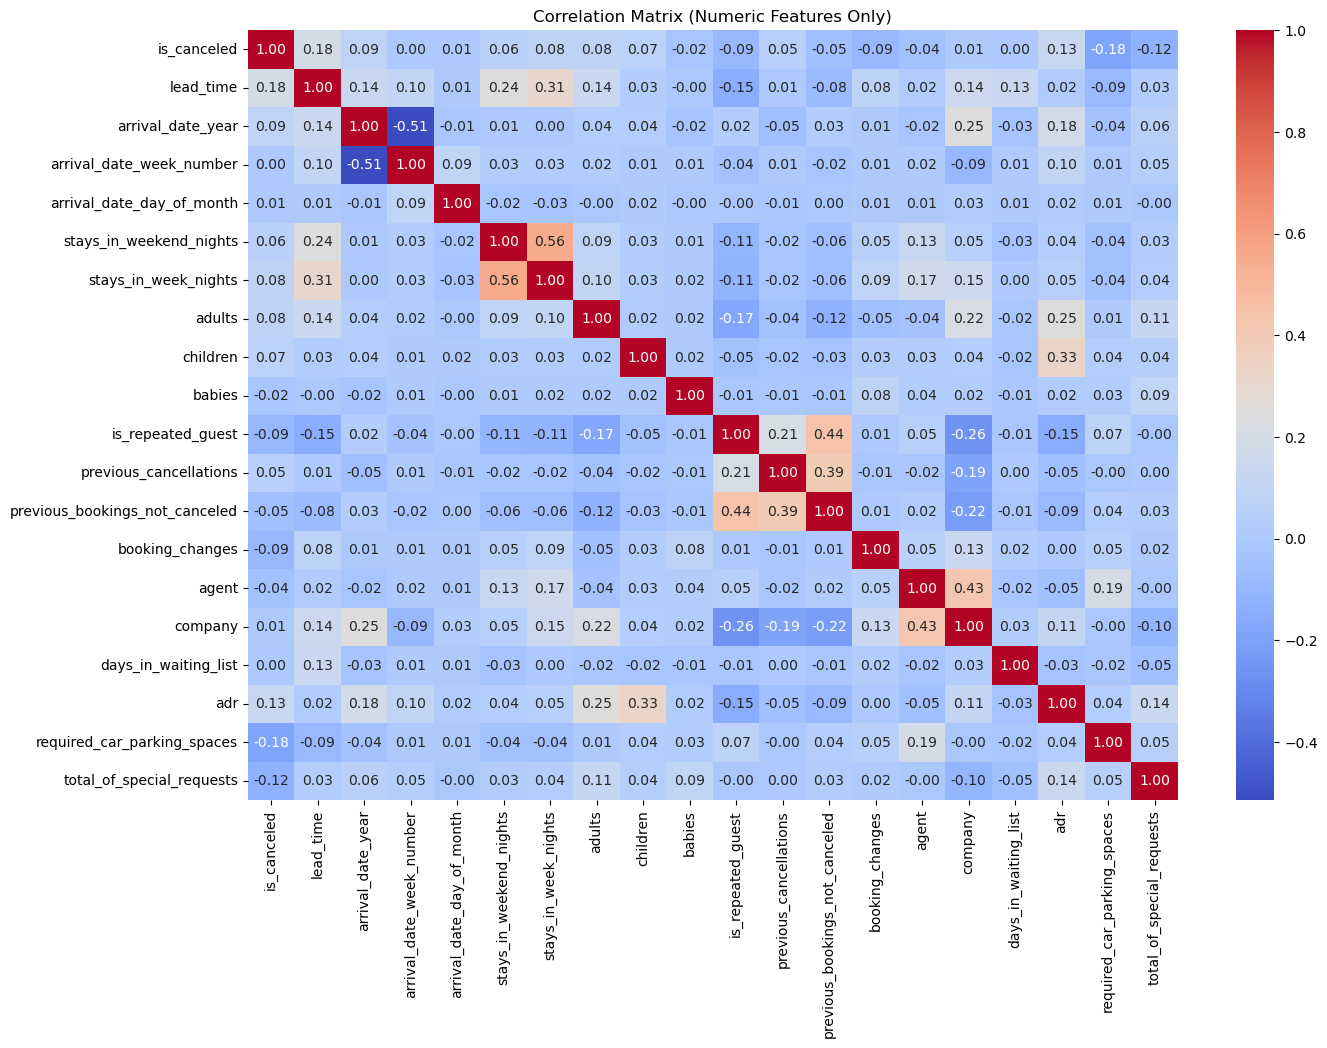

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [ ]:
#Categorical Feature vs Target
# Hotel type vs Cancellation

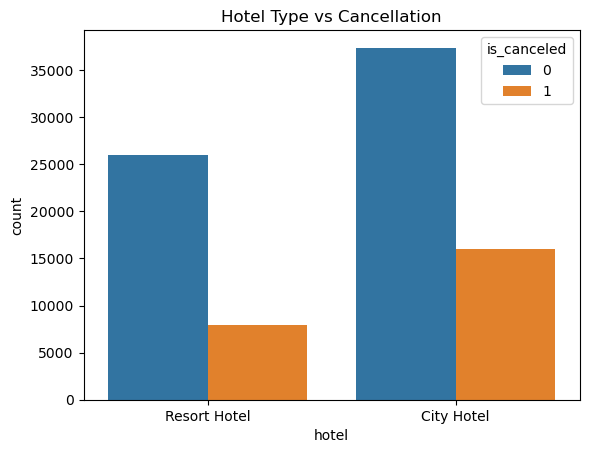

In [25]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title("Hotel Type vs Cancellation")
plt.show()

In [ ]:
#Numerical Features Analysis

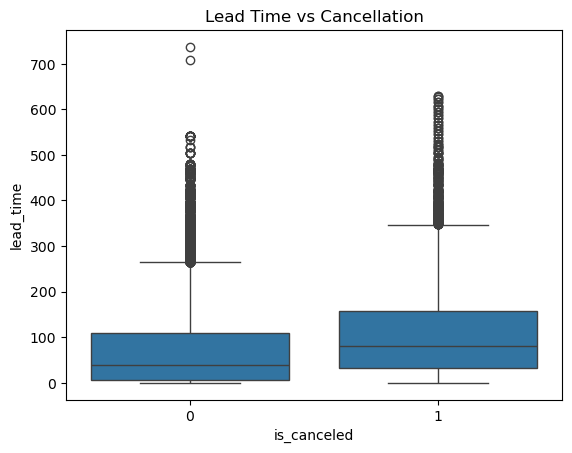

In [27]:
# Lead time vs Cancellation
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation")
plt.show()

In [ ]:
#Combine Date Columns (Optional)

In [29]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

In [ ]:
#Drop Unnecessary Columns


In [31]:
df.drop(['reservation_status_date', 'arrival_date_year', 'arrival_date_month', 
         'arrival_date_day_of_month', 'arrival_date_week_number'], axis=1, inplace=True)

In [ ]:
#Encoding Categorical Variables

In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
#Final Cleaning Before Modeling

In [35]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("is_canceled", axis=1)
y = df_encoded["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train a Classification Model # Random Forest

In [39]:
# Drop datetime columns explicitly
if 'reservation_status_date' in df.columns:
    df.drop(['reservation_status_date'], axis=1, inplace=True)


In [45]:
# Re-encode categorical features (just to be safe)
df_encoded = pd.get_dummies(df, drop_first=True)

In [47]:
# Double-check: Drop any columns with non-numeric types
X = df_encoded.drop("is_canceled", axis=1)
X = X.select_dtypes(include=[np.number])  # Ensure only numeric data

In [49]:
# Target
y = df_encoded["is_canceled"]


In [51]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     12733
           1       0.66      0.50      0.57      4747

    accuracy                           0.79     17480
   macro avg       0.74      0.70      0.72     17480
weighted avg       0.78      0.79      0.78     17480



In [ ]:
#Optional: Verify dtypes before training

In [55]:
print(X_train.dtypes.value_counts())

int64      12
float64     4
Name: count, dtype: int64


In [ ]:
#Feature Importance

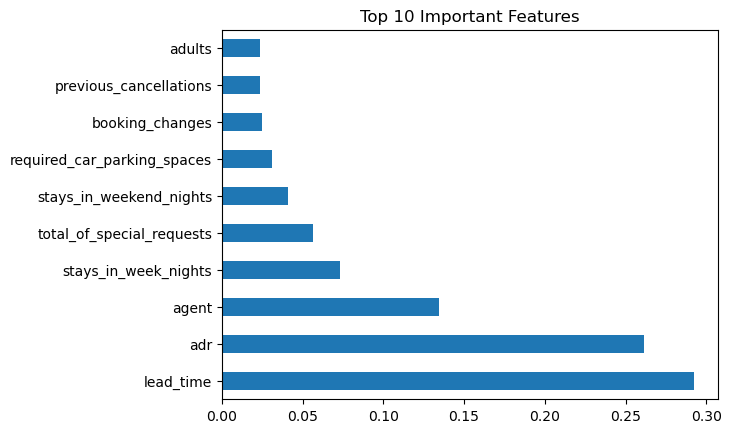

In [57]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()